## [作業重點]
了解如何使用 Sklearn 中的 hyper-parameter search 找出最佳的超參數

### 作業
請使用不同的資料集，並使用 hyper-parameter search 的方式，看能不能找出最佳的超參數組合

In [8]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
# set data_path

train_path = ('D:/GitHub/3rd-ML100Days/HomeWork/Data/data-science-london-scikit-learn/train.csv')
test_path = ('D:/GitHub/3rd-ML100Days/HomeWork/Data/data-science-london-scikit-learn/test.csv')
trainLabel_path = ('D:/GitHub/3rd-ML100Days/HomeWork/Data/data-science-london-scikit-learn/trainLabels.csv')

# read data from data_path
train = pd.read_csv(train_path, header=None)
test = pd.read_csv(test_path, header=None)
trainLabel = pd.read_csv(trainLabel_path, header=None)

In [12]:
# head, shape
print("train.head() :") 
display(train.head())
display(train.shape)

print("trainLabel.head() :") 
display(trainLabel.head())
display(trainLabel.shape)

print("test.head() :") 
display(test.head())
display(test.shape)

train.head() :


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


(1000, 40)

trainLabel.head() :


,0
0,1
1,0
2,0
3,1
4,0


(1000, 1)

test.head() :


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


(9000, 40)

In [13]:
# 檢視資料中各個欄位類型的數量
train.dtypes.value_counts()

float64    40
dtype: int64

In [14]:
train.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39],
           dtype='int64')

In [15]:
# info
print("train.info() :") 
display(train.info())

print("test.info() :") 
display(test.info())

print("trainLabel.info() :") 
display(trainLabel.info())

train.info() :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
0     1000 non-null float64
1     1000 non-null float64
2     1000 non-null float64
3     1000 non-null float64
4     1000 non-null float64
5     1000 non-null float64
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null float64
9     1000 non-null float64
10    1000 non-null float64
11    1000 non-null float64
12    1000 non-null float64
13    1000 non-null float64
14    1000 non-null float64
15    1000 non-null float64
16    1000 non-null float64
17    1000 non-null float64
18    1000 non-null float64
19    1000 non-null float64
20    1000 non-null float64
21    1000 non-null float64
22    1000 non-null float64
23    1000 non-null float64
24    1000 non-null float64
25    1000 non-null float64
26    1000 non-null float64
27    1000 non-null float64
28    1000 non-null float64
29    1000 non-null float64
30    1000 non-null float64
31    1000 

None

test.info() :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 40 columns):
0     9000 non-null float64
1     9000 non-null float64
2     9000 non-null float64
3     9000 non-null float64
4     9000 non-null float64
5     9000 non-null float64
6     9000 non-null float64
7     9000 non-null float64
8     9000 non-null float64
9     9000 non-null float64
10    9000 non-null float64
11    9000 non-null float64
12    9000 non-null float64
13    9000 non-null float64
14    9000 non-null float64
15    9000 non-null float64
16    9000 non-null float64
17    9000 non-null float64
18    9000 non-null float64
19    9000 non-null float64
20    9000 non-null float64
21    9000 non-null float64
22    9000 non-null float64
23    9000 non-null float64
24    9000 non-null float64
25    9000 non-null float64
26    9000 non-null float64
27    9000 non-null float64
28    9000 non-null float64
29    9000 non-null float64
30    9000 non-null float64
31    9000 

None

trainLabel.info() :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
0    1000 non-null int64
dtypes: int64(1)
memory usage: 7.9 KB


None

In [16]:
# describe
print("train.describe() :") 
display(train.describe())

train.describe() :


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [17]:
#Missing Value
train.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
dtype: int64

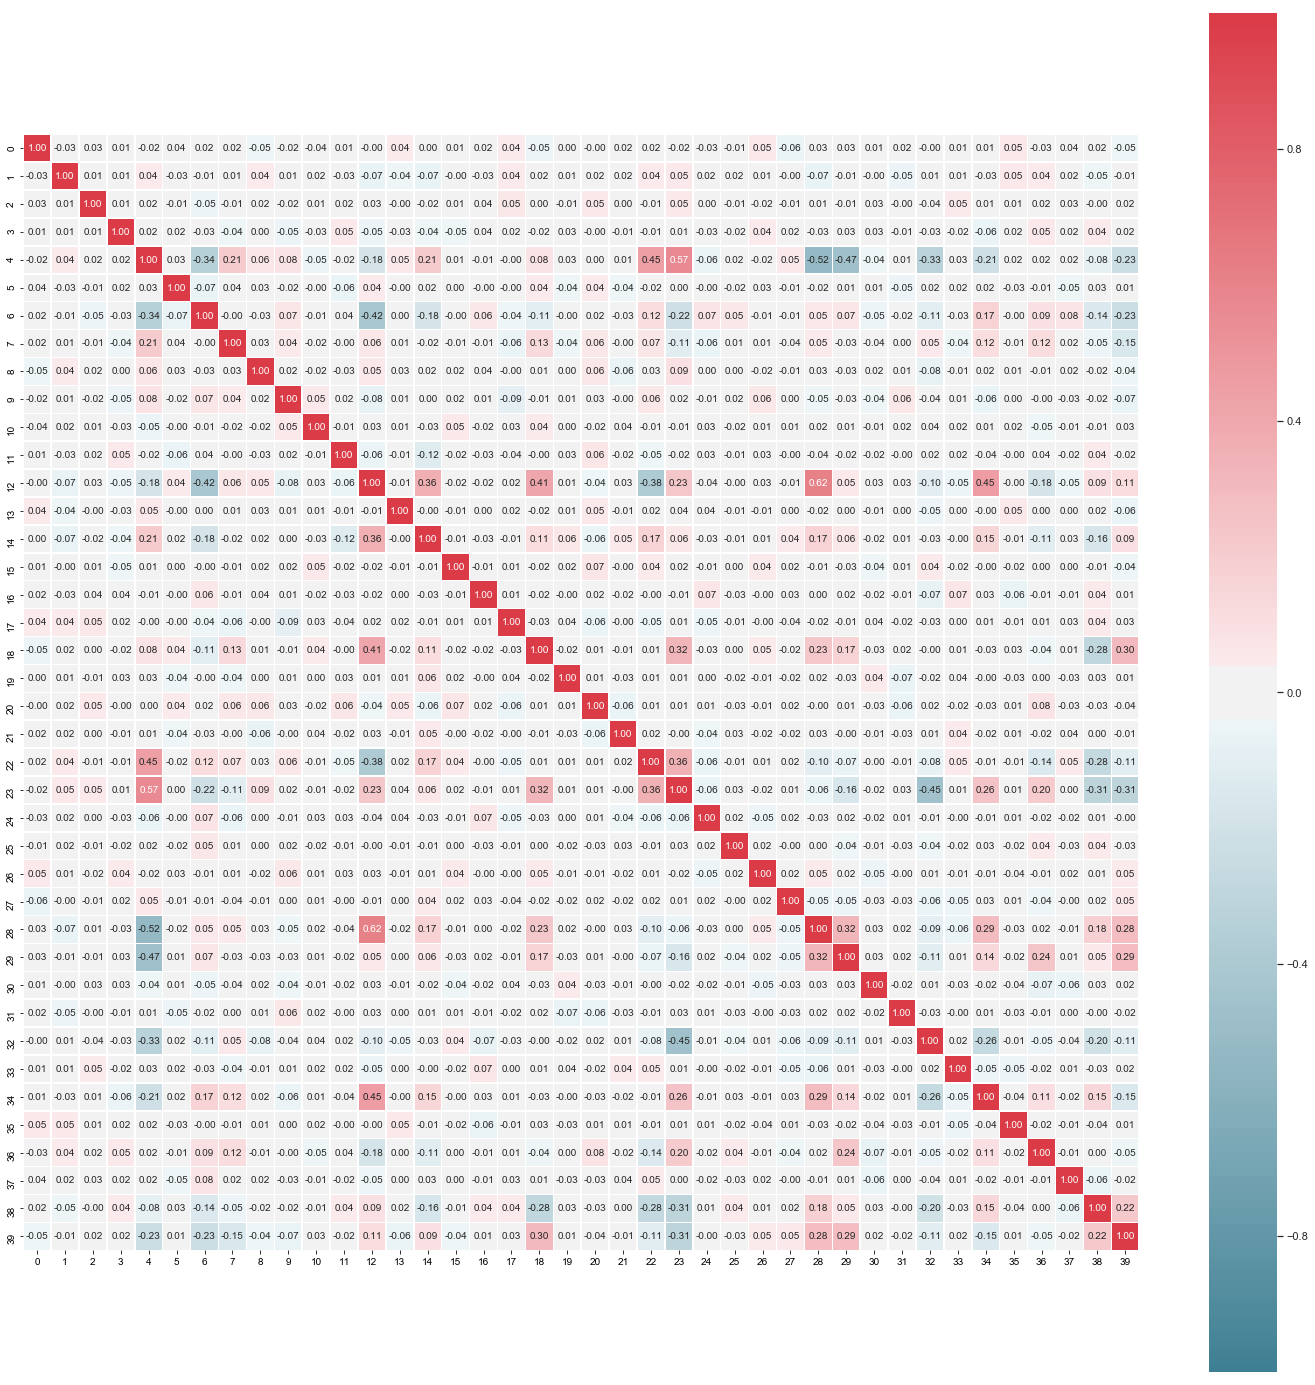

In [18]:
#eda
df = train
df_predict_cols = train.columns

fig, ax = plt.subplots(figsize=(25,25))

cm = np.corrcoef(df[df_predict_cols].values.T)
sns.set(font_scale = 1)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = ".2f", annot_kws = {"size" : 10},
                 linewidths = 0.5,
                 vmin = -1.0, vmax = 1.0,
                 cmap = sns.diverging_palette(220, 10, as_cmap=True), #"YlGnBu",
                yticklabels = df_predict_cols, xticklabels = df_predict_cols)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000158227529E8>,
      dtype=object)

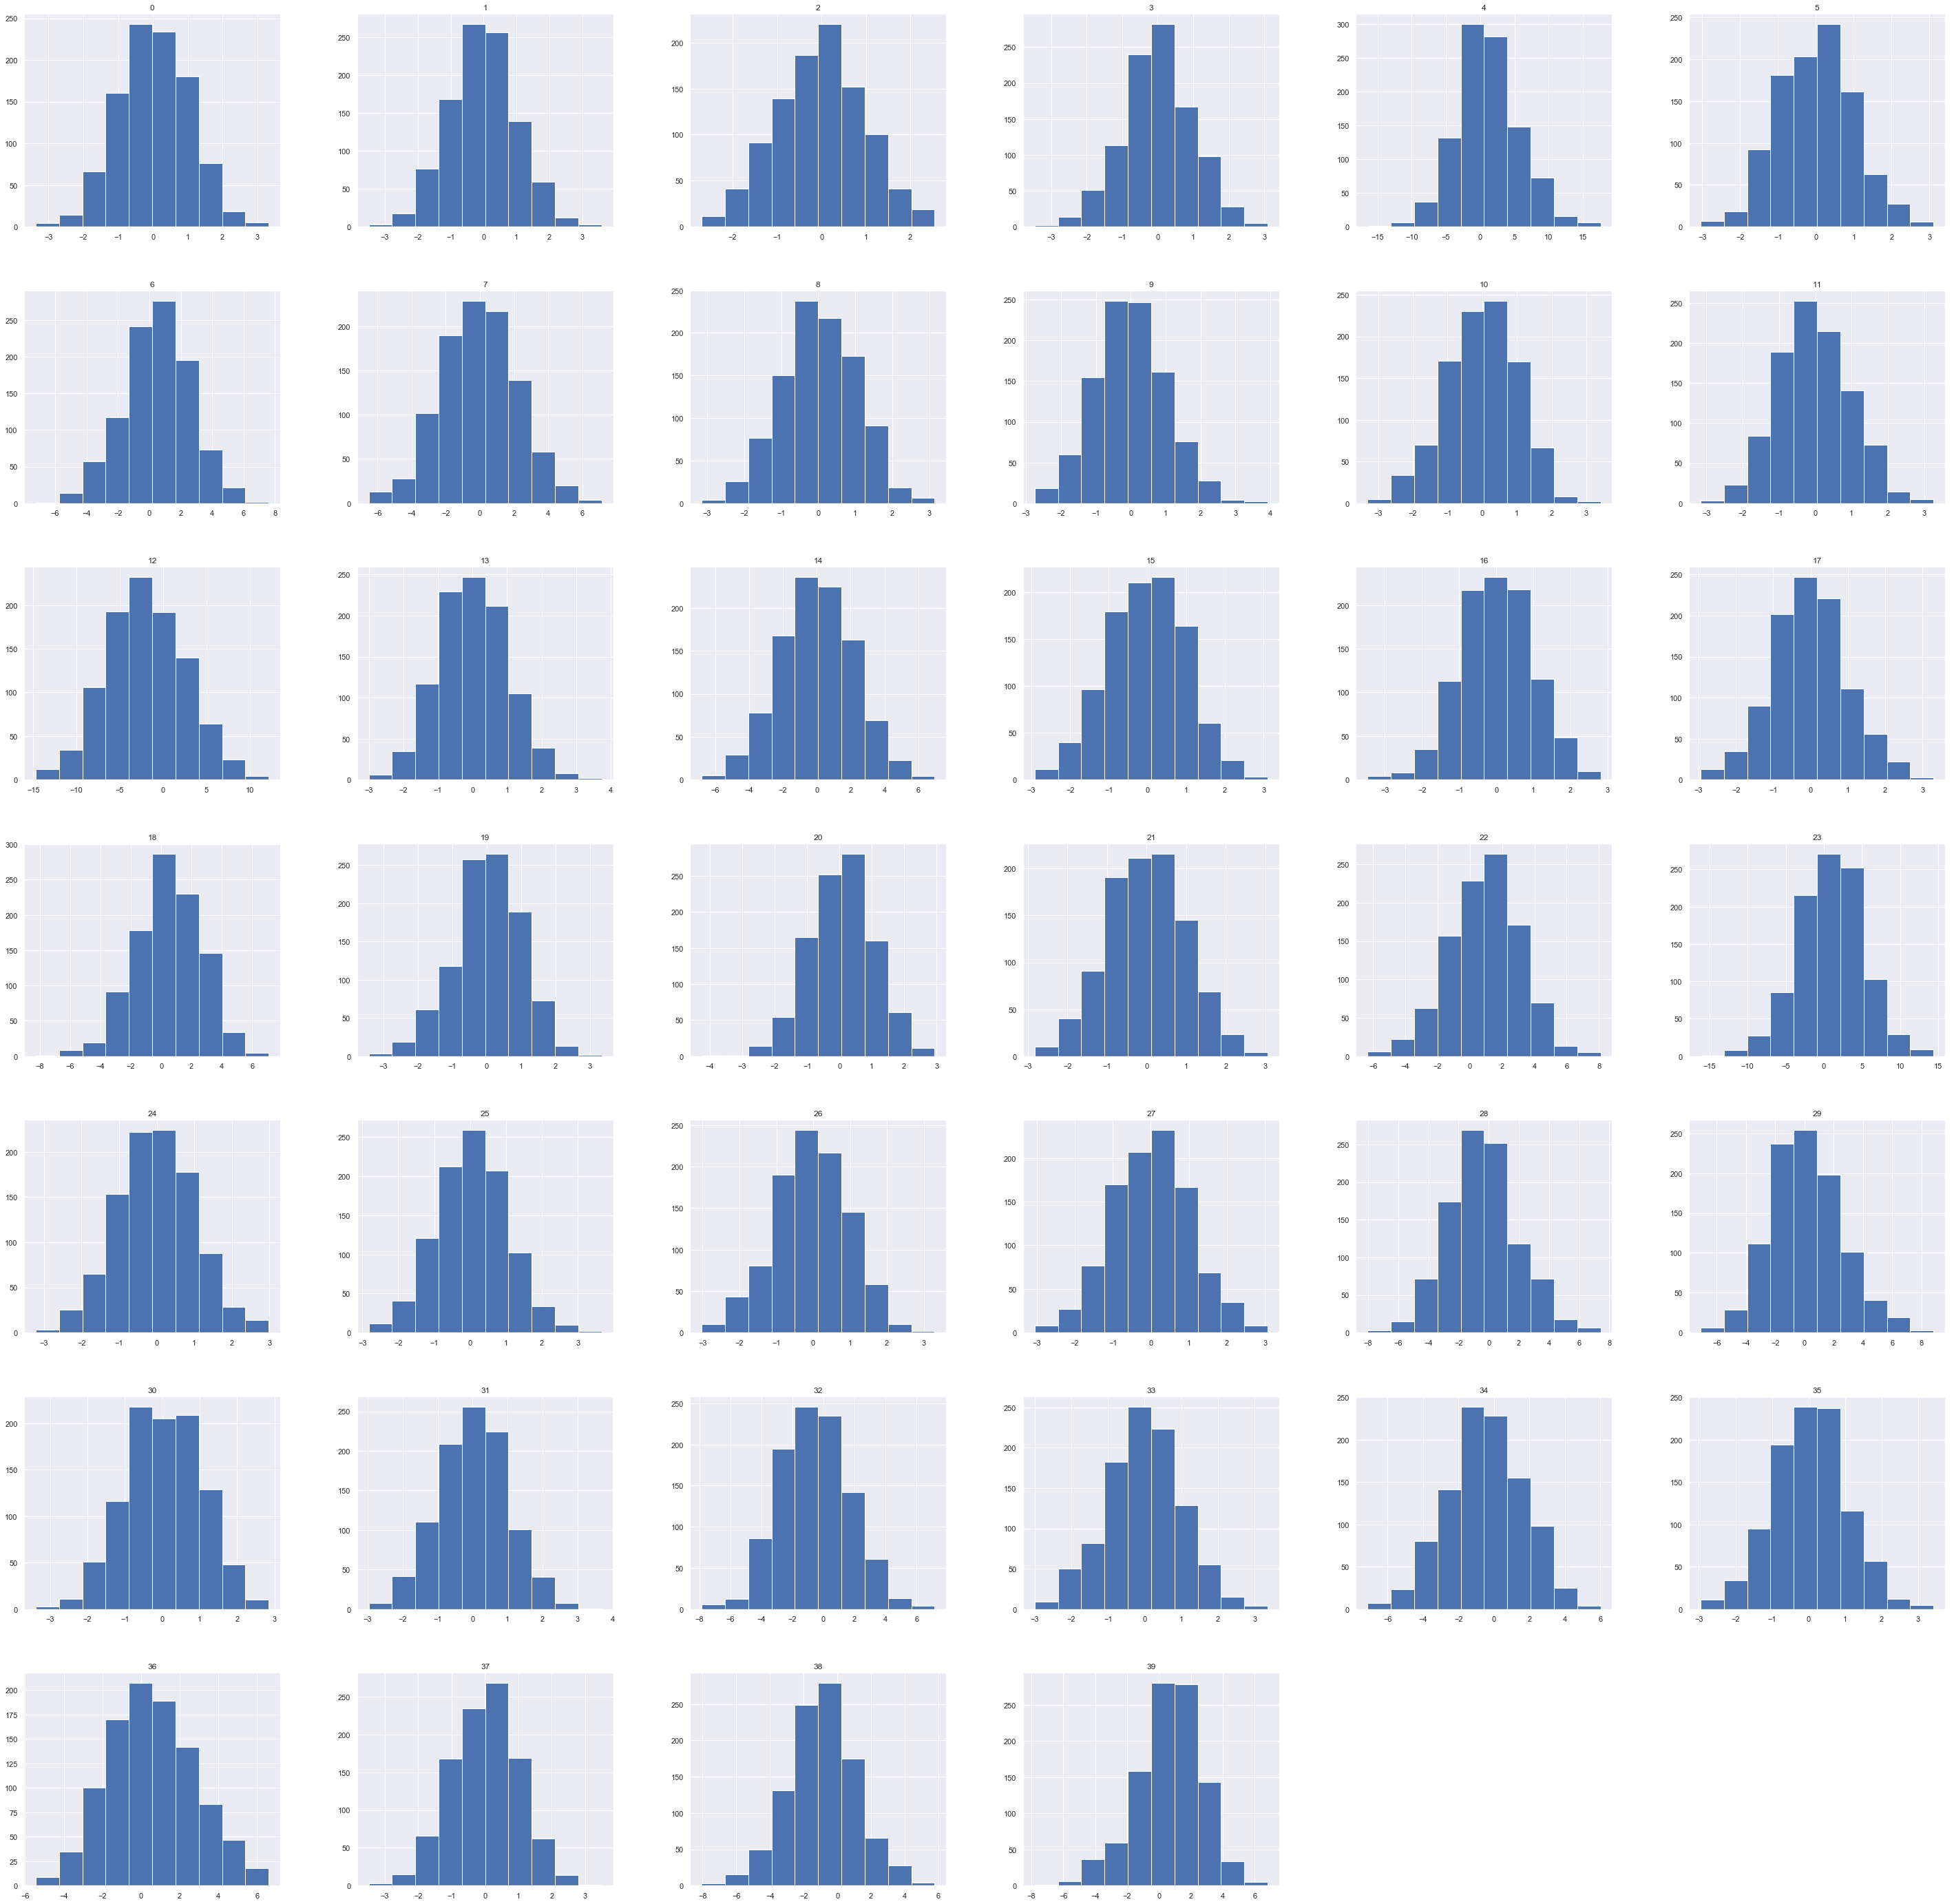

In [19]:
df.hist(figsize=(50,50))

Numbers of remain columns : 40
0  範圍 ：  -3.365710934320055 - 3.3262460029909557


count    1000.000000
mean        0.025596
std         1.008282
min        -3.365711
25%        -0.669010
50%         0.027895
75%         0.762520
max         3.326246
Name: 0, dtype: float64

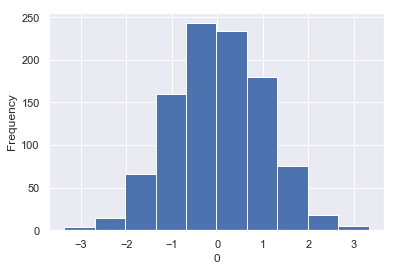

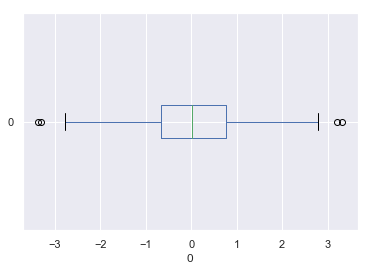

1  範圍 ：  -3.4920855905014805 - 3.583870444370492


count    1000.000000
mean       -0.024526
std         1.016298
min        -3.492086
25%        -0.693937
50%        -0.033194
75%         0.682753
max         3.583870
Name: 1, dtype: float64

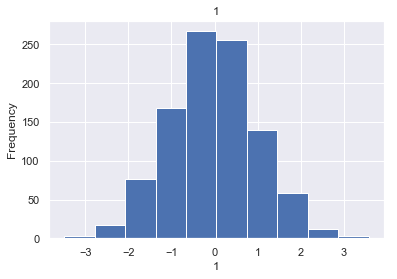

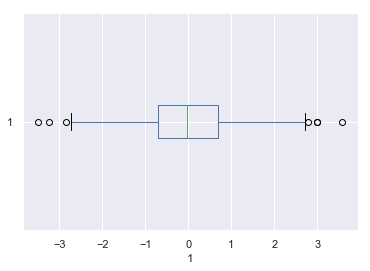

2  範圍 ：  -2.6956019378040903 - 2.546506518106591


count    1000.000000
mean       -0.024088
std         0.979109
min        -2.695602
25%        -0.698830
50%         0.008145
75%         0.661434
max         2.546507
Name: 2, dtype: float64

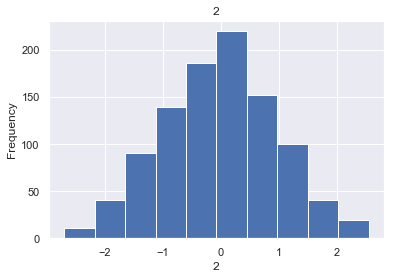

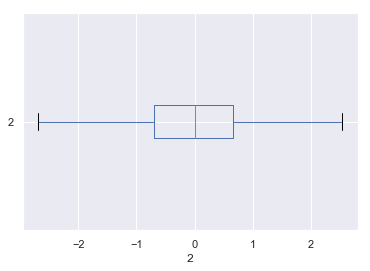

3  範圍 ：  -3.460471428852842 - 3.0887379065173266


count    1000.000000
mean       -0.002271
std         0.970575
min        -3.460471
25%        -0.617557
50%         0.002327
75%         0.640743
max         3.088738
Name: 3, dtype: float64

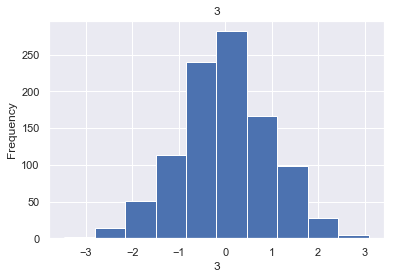

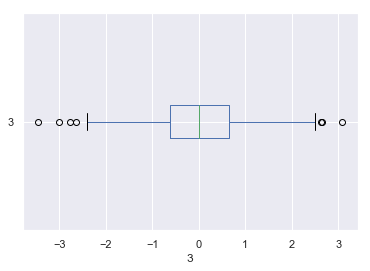

4  範圍 ：  -16.421901472901524 - 17.56534450562528


count    1000.000000
mean        1.092329
std         4.538834
min       -16.421901
25%        -1.801997
50%         0.862818
75%         3.843172
max        17.565345
Name: 4, dtype: float64

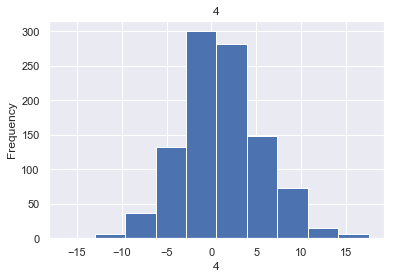

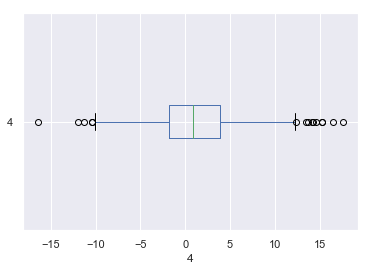

5  範圍 ：  -3.0412501344576195 - 3.102997314496187


count    1000.000000
mean       -0.006250
std         0.989128
min        -3.041250
25%        -0.732265
50%         0.027041
75%         0.671456
max         3.102997
Name: 5, dtype: float64

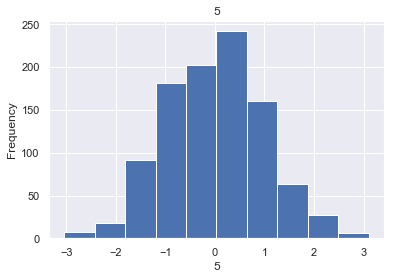

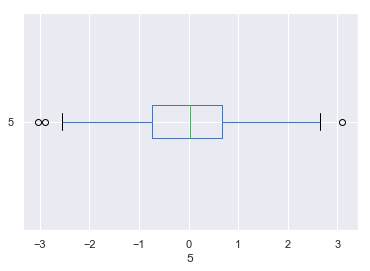

6  範圍 ：  -7.224760633522439 - 7.592666376348799


count    1000.000000
mean        0.497342
std         2.118819
min        -7.224761
25%        -0.838619
50%         0.582321
75%         1.913664
max         7.592666
Name: 6, dtype: float64

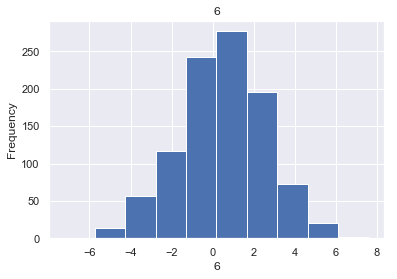

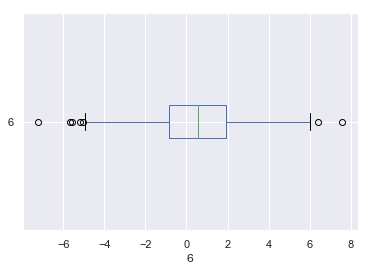

7  範圍 ：  -6.509084243646509 - 7.130097427981336


count    1000.000000
mean       -0.037883
std         2.232256
min        -6.509084
25%        -1.604037
50%         0.018809
75%         1.438304
max         7.130097
Name: 7, dtype: float64

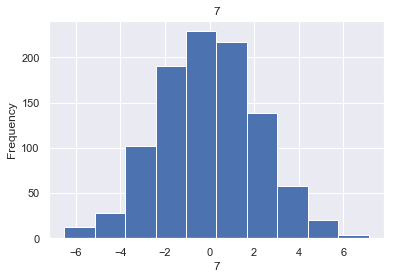

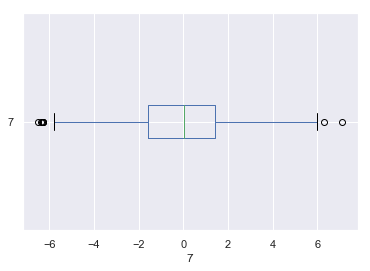

8  範圍 ：  -3.1455877547907547 - 3.1452582309748798


count    1000.000000
mean        0.026391
std         1.001064
min        -3.145588
25%        -0.677562
50%         0.022092
75%         0.741310
max         3.145258
Name: 8, dtype: float64

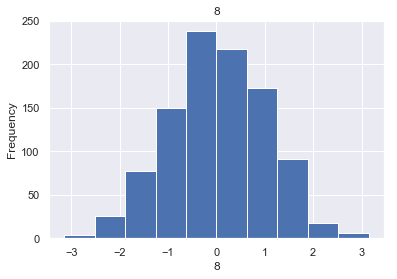

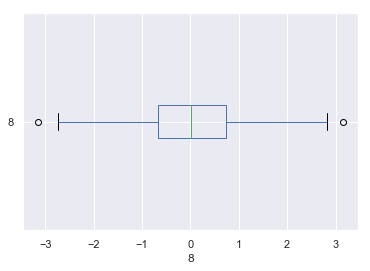

9  範圍 ：  -2.749811733182846 - 3.919425758354087


count    1000.000000
mean       -0.003597
std         1.013520
min        -2.749812
25%        -0.682220
50%        -0.036110
75%         0.665364
max         3.919426
Name: 9, dtype: float64

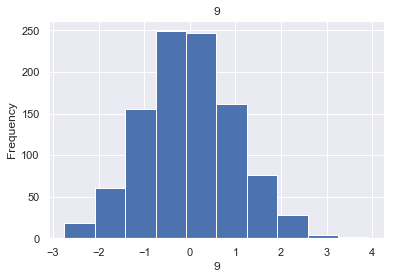

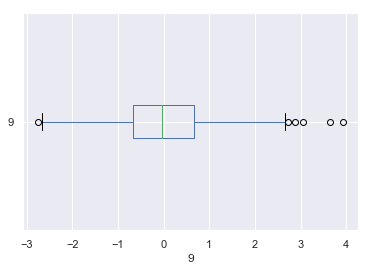

10  範圍 ：  -3.304074466459427 - 3.409653452684431


count    1000.000000
mean       -0.016250
std         1.026325
min        -3.304074
25%        -0.713704
50%         0.019479
75%         0.709416
max         3.409653
Name: 10, dtype: float64

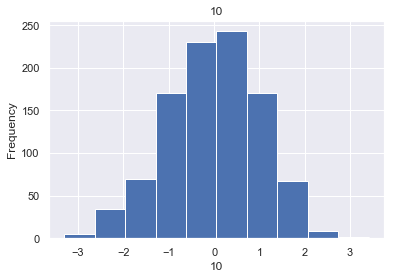

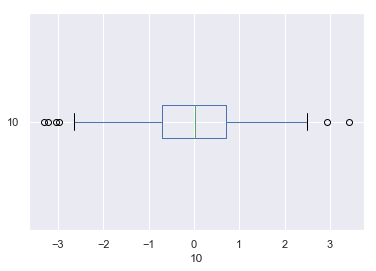

11  範圍 ：  -3.1574359243847563 - 3.2530315911997514


count    1000.000000
mean       -0.038010
std         0.985889
min        -3.157436
25%        -0.730293
50%        -0.075950
75%         0.644553
max         3.253032
Name: 11, dtype: float64

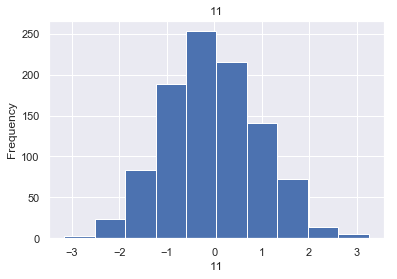

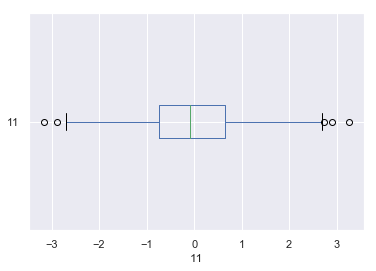

12  範圍 ：  -14.706079671024456 - 12.186445301840687


count    1000.000000
mean       -1.985616
std         4.528096
min       -14.706080
25%        -5.094964
50%        -2.103532
75%         1.186164
max        12.186445
Name: 12, dtype: float64

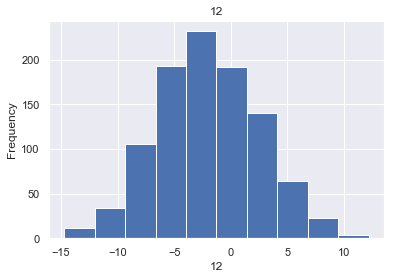

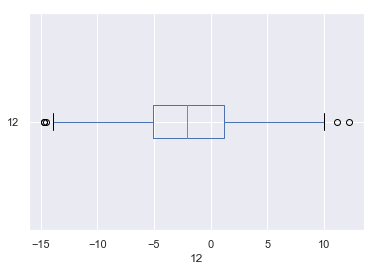

13  範圍 ：  -3.002151142025112 - 3.7374225522243134


count    1000.000000
mean        0.012374
std         0.995652
min        -3.002151
25%        -0.694081
50%        -0.005946
75%         0.664921
max         3.737423
Name: 13, dtype: float64

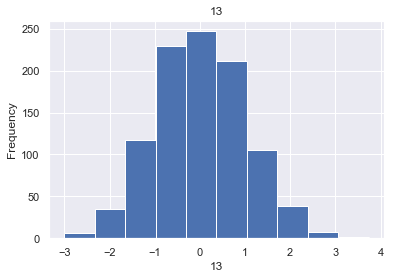

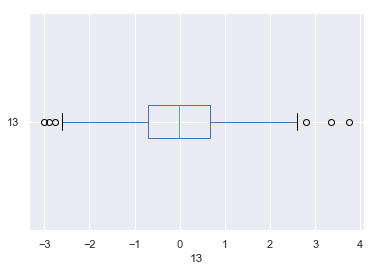

14  範圍 ：  -6.790633415662062 - 6.9597363076027285


count    1000.000000
mean       -0.029229
std         2.164547
min        -6.790633
25%        -1.441443
50%        -0.033219
75%         1.492611
max         6.959736
Name: 14, dtype: float64

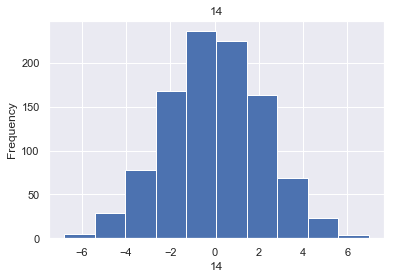

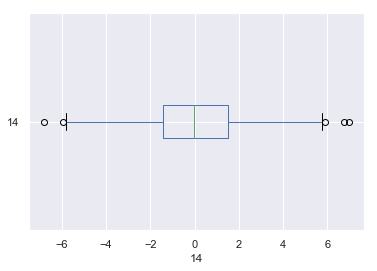

15  範圍 ：  -2.914728733339179 - 3.1009351137491263


count    1000.000000
mean       -0.039307
std         1.002481
min        -2.914729
25%        -0.757619
50%        -0.019046
75%         0.678748
max         3.100935
Name: 15, dtype: float64

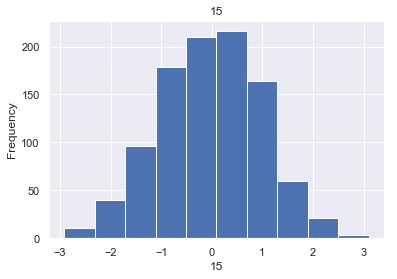

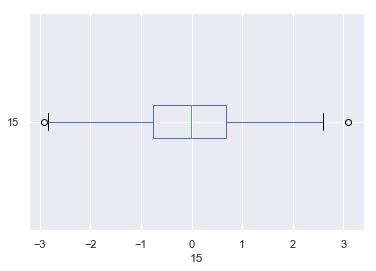

16  範圍 ：  -3.46404823635581 - 2.8051965121943114


count    1000.000000
mean       -0.004091
std         0.970401
min        -3.464048
25%        -0.668335
50%         0.008360
75%         0.674583
max         2.805197
Name: 16, dtype: float64

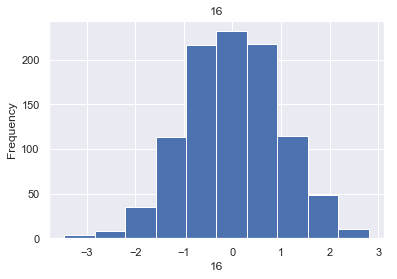

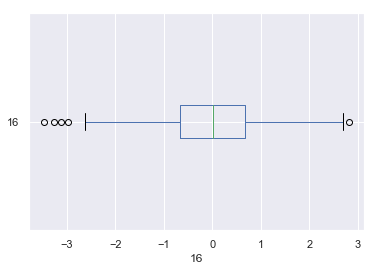

17  範圍 ：  -2.944093024563838 - 3.2915436332760755


count    1000.000000
mean       -0.032836
std         1.000130
min        -2.944093
25%        -0.727001
50%        -0.011366
75%         0.588732
max         3.291544
Name: 17, dtype: float64

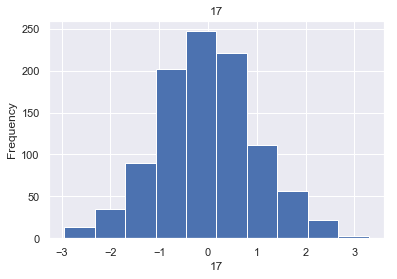

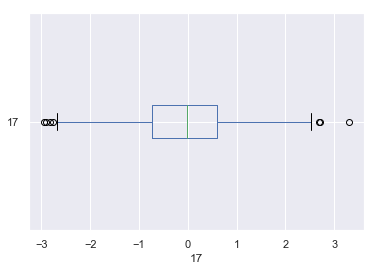

18  範圍 ：  -8.258306078387369 - 7.07443237515732


count    1000.000000
mean        0.428313
std         2.176020
min        -8.258306
25%        -0.983595
50%         0.488217
75%         1.915022
max         7.074432
Name: 18, dtype: float64

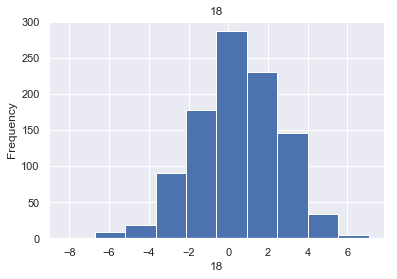

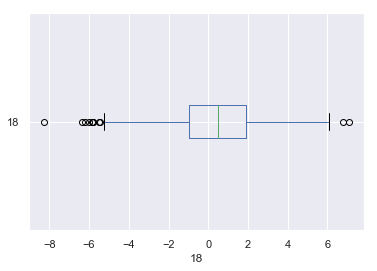

19  範圍 ：  -3.423874744757959 - 3.343812172447618


count    1000.000000
mean        0.043427
std         0.987689
min        -3.423875
25%        -0.594638
50%         0.082688
75%         0.711525
max         3.343812
Name: 19, dtype: float64

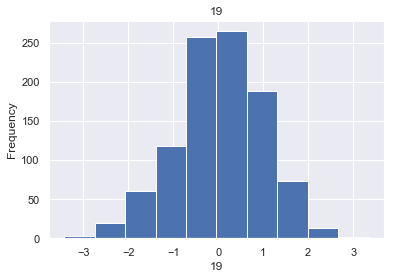

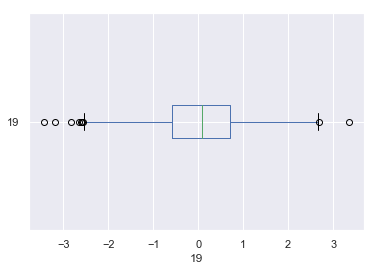

20  範圍 ：  -4.251381703455512 - 2.938032828377816


count    1000.000000
mean        0.073461
std         0.967282
min        -4.251382
25%        -0.588171
50%         0.094307
75%         0.727896
max         2.938033
Name: 20, dtype: float64

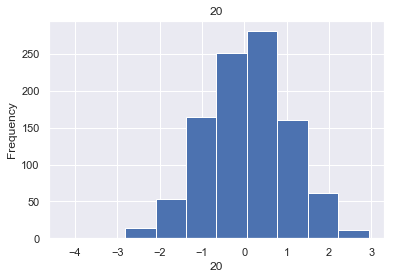

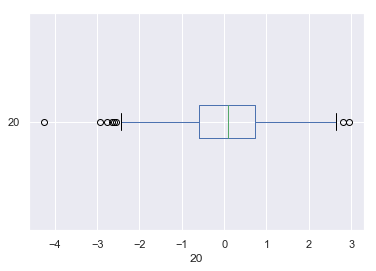

21  範圍 ：  -2.8226438097572197 - 3.053261509267568


count    1000.000000
mean       -0.005140
std         0.980319
min        -2.822644
25%        -0.698036
50%        -0.004404
75%         0.673427
max         3.053262
Name: 21, dtype: float64

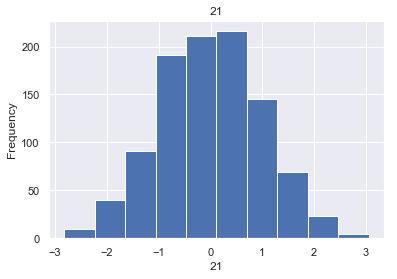

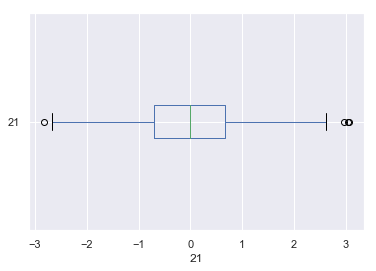

22  範圍 ：  -6.337521914633045 - 8.096837537337406


count    1000.000000
mean        0.912288
std         2.178778
min        -6.337522
25%        -0.542526
50%         1.050071
75%         2.367748
max         8.096838
Name: 22, dtype: float64

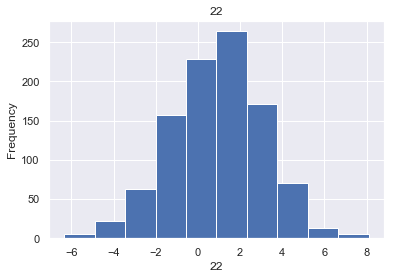

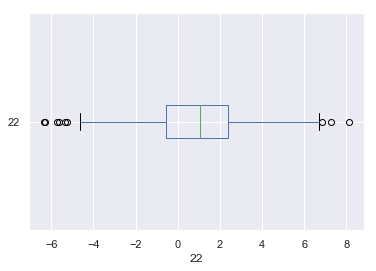

23  範圍 ：  -16.15606959164308 - 14.373680538500281


count    1000.000000
mean        0.902301
std         4.241903
min       -16.156070
25%        -1.822188
50%         0.970403
75%         3.825862
max        14.373681
Name: 23, dtype: float64

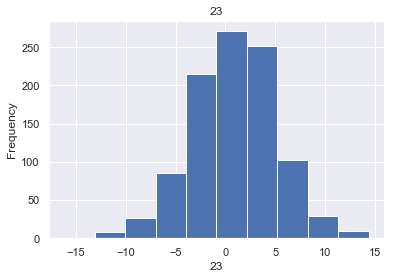

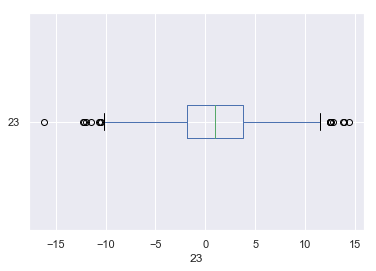

24  範圍 ：  -3.2184462050450504 - 2.9815822578694107


count    1000.000000
mean       -0.023110
std         1.019566
min        -3.218446
25%        -0.720837
50%        -0.012183
75%         0.671318
max         2.981582
Name: 24, dtype: float64

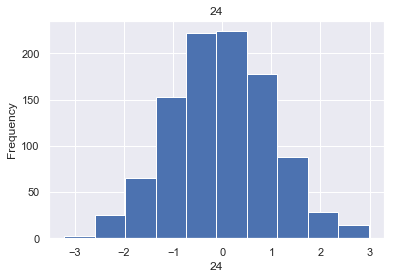

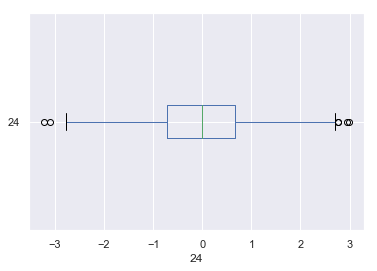

25  範圍 ：  -2.820792134918656 - 3.662800390973544


count    1000.000000
mean        0.047473
std         0.995752
min        -2.820792
25%        -0.617001
50%         0.014636
75%         0.731892
max         3.662800
Name: 25, dtype: float64

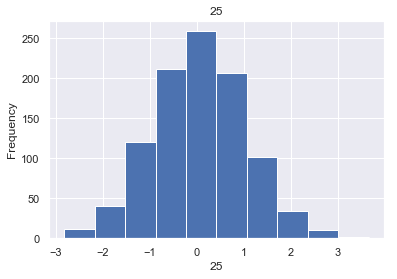

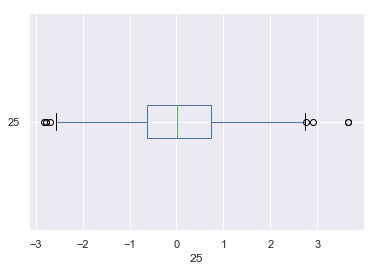

26  範圍 ：  -3.0238111279004047 - 3.2939107503921434


count    1000.000000
mean       -0.041117
std         0.998182
min        -3.023811
25%        -0.668062
50%        -0.017535
75%         0.642797
max         3.293911
Name: 26, dtype: float64

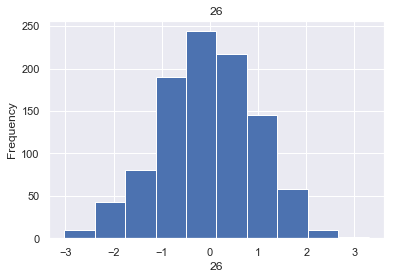

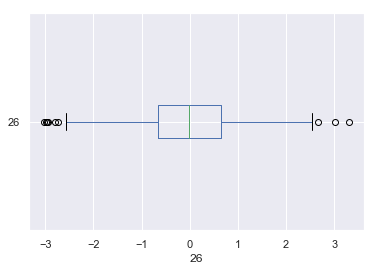

27  範圍 ：  -3.0543836488637304 - 3.06988491528095


count    1000.000000
mean        0.012985
std         1.030610
min        -3.054384
25%        -0.696411
50%         0.039219
75%         0.706336
max         3.069885
Name: 27, dtype: float64

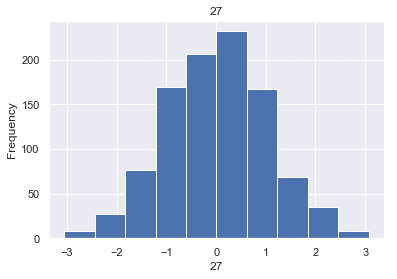

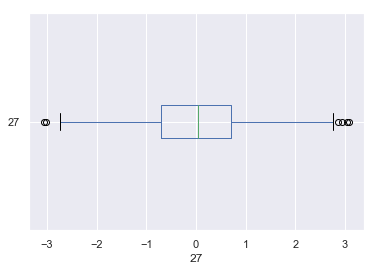

28  範圍 ：  -8.034420590510532 - 7.4131730292347235


count    1000.000000
mean       -0.395782
std         2.296818
min        -8.034421
25%        -1.936374
50%        -0.489296
75%         1.044188
max         7.413173
Name: 28, dtype: float64

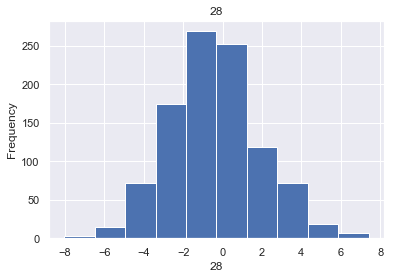

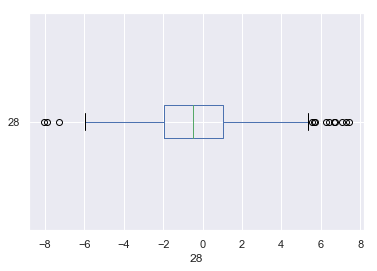

29  範圍 ：  -7.105722603340969 - 8.812739010572113


count    1000.000000
mean        0.123921
std         2.410453
min        -7.105723
25%        -1.562374
50%        -0.040604
75%         1.614308
max         8.812739
Name: 29, dtype: float64

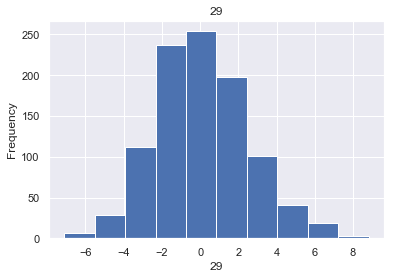

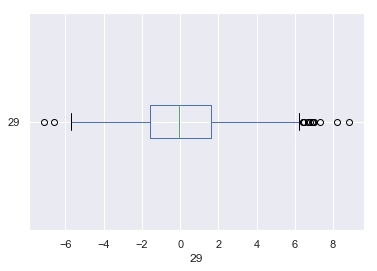

30  範圍 ：  -3.379193681730551 - 2.8447917731511514


count    1000.000000
mean        0.030651
std         1.011645
min        -3.379194
25%        -0.659457
50%         0.049416
75%         0.747031
max         2.844792
Name: 30, dtype: float64

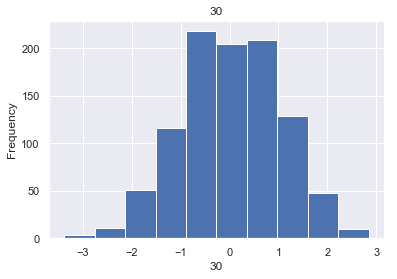

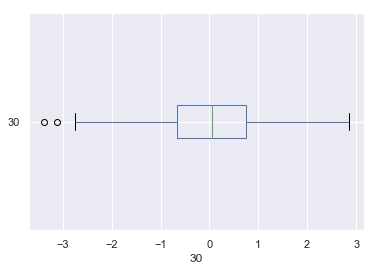

31  範圍 ：  -2.9711245367064296 - 3.6880472499350656


count    1000.000000
mean        0.022951
std         1.001375
min        -2.971125
25%        -0.696032
50%         0.049778
75%         0.699917
max         3.688047
Name: 31, dtype: float64

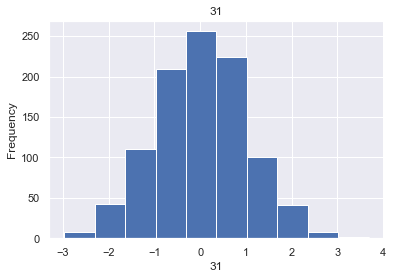

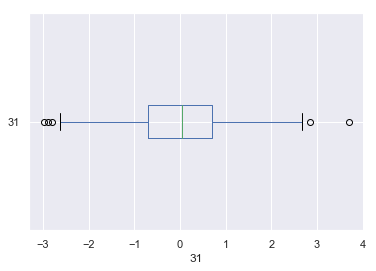

32  範圍 ：  -7.840889691965225 - 7.160379064069076


count    1000.000000
mean       -0.542491
std         2.239939
min        -7.840890
25%        -2.121943
50%        -0.568262
75%         0.939348
max         7.160379
Name: 32, dtype: float64

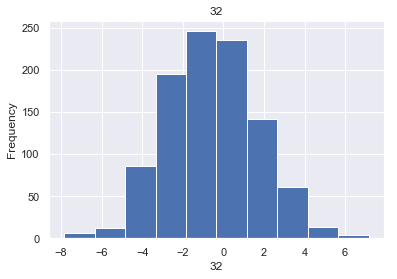

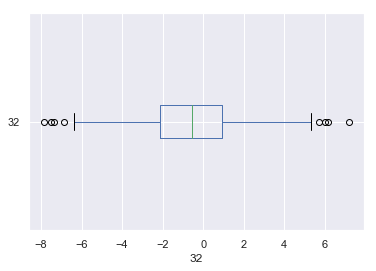

33  範圍 ：  -2.9995640785796347 - 3.3536305306470786


count    1000.000000
mean       -0.011608
std         1.022456
min        -2.999564
25%        -0.664550
50%        -0.028097
75%         0.651374
max         3.353631
Name: 33, dtype: float64

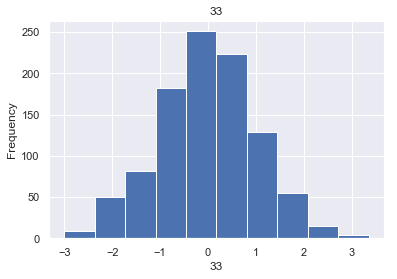

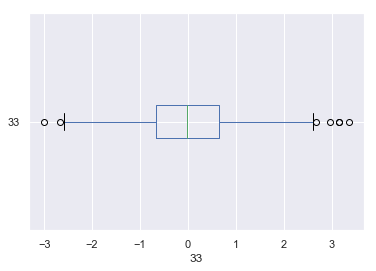

34  範圍 ：  -7.124105345129295 - 6.005817535530427


count    1000.000000
mean       -0.483507
std         2.121281
min        -7.124105
25%        -1.879247
50%        -0.493575
75%         1.005795
max         6.005818
Name: 34, dtype: float64

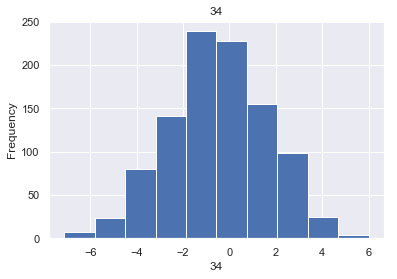

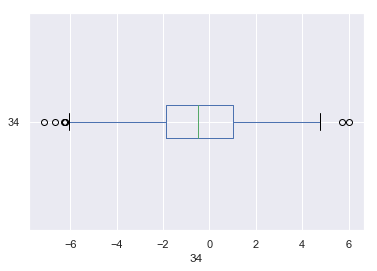

35  範圍 ：  -2.952358369706773 - 3.4205610293237405


count    1000.000000
mean        0.033371
std         1.007044
min        -2.952358
25%        -0.642861
50%         0.037732
75%         0.691800
max         3.420561
Name: 35, dtype: float64

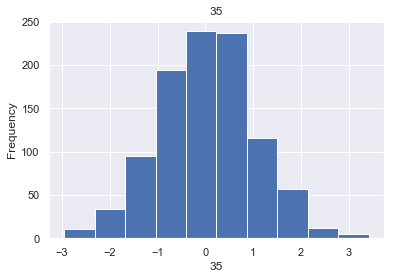

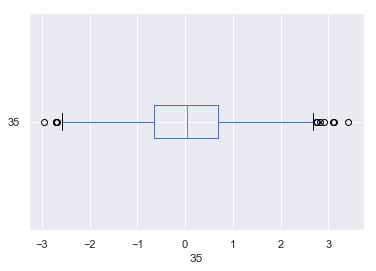

36  範圍 ：  -5.452254038673658 - 6.603499090063512


count    1000.000000
mean        0.567185
std         2.227876
min        -5.452254
25%        -1.059786
50%         0.455474
75%         2.122157
max         6.603499
Name: 36, dtype: float64

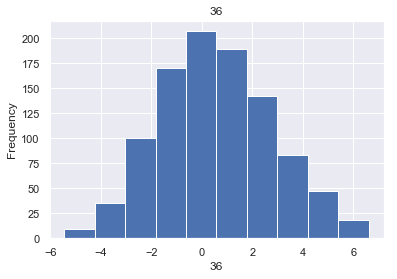

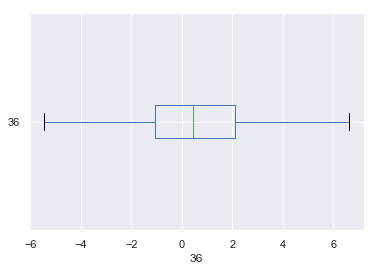

37  範圍 ：  -3.4739132920764035 - 3.4925475815377807


count    1000.000000
mean        0.006849
std         0.997635
min        -3.473913
25%        -0.691162
50%         0.038284
75%         0.693535
max         3.492548
Name: 37, dtype: float64

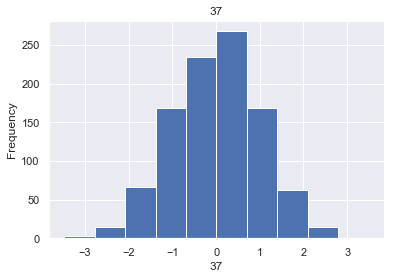

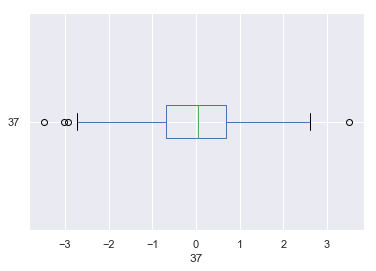

38  範圍 ：  -8.05172239306491 - 5.774119916313516


count    1000.000000
mean       -0.892659
std         2.022022
min        -8.051722
25%        -2.220126
50%        -0.855470
75%         0.388698
max         5.774120
Name: 38, dtype: float64

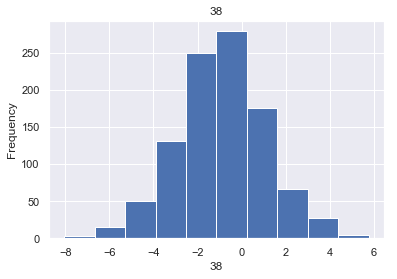

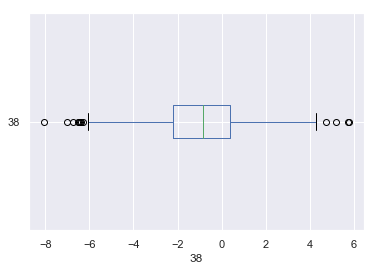

39  範圍 ：  -7.799086107717904 - 6.803984337703128


count    1000.000000
mean        0.609451
std         2.045439
min        -7.799086
25%        -0.565041
50%         0.779944
75%         1.992193
max         6.803984
Name: 39, dtype: float64

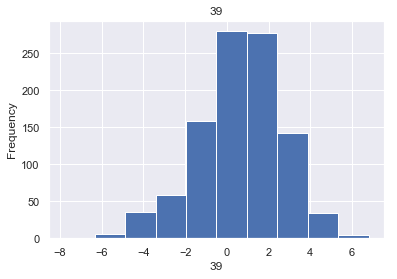

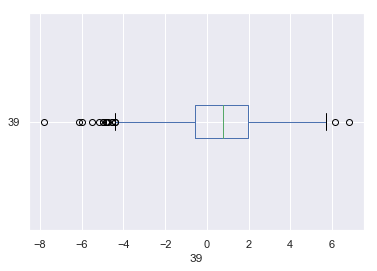

In [20]:
# outliers

# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
dtype_select = [np.dtype('float64'),np.dtype('int64')] # not just "float"

numeric_columns = list(df.columns[list(df.dtypes.isin(dtype_select))])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(df[numeric_columns].columns[list(df[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns : %s" % len(numeric_columns))
# print(numeric_columns)

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    """
    Your CODE HERE, make the box plot
    """
    print(col," 範圍 ： ",df[col].min(),"-",df[col].max())
    # describe
    display(df[col].describe())
    
    # hist
    df[col].plot.hist(title = col)   #     df[col].hist()
    plt.xlabel(col)
    plt.show()
    
    # box plot
    df[[col]].boxplot(vert=False)
    plt.xlabel(col)
    plt.show()

In [21]:
# outliers
from scipy import stats

outlier_col=[]
for col in numeric_columns:
    x=np.abs(stats.zscore(df[col][:]))
    for i in range (0,len(x)):
        if x[i] > 3:
            if col not in outlier_col:
                outlier_col.append(col)
                    
print(outlier_col)

[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39]


In [22]:
def printPercentile(x) :
    print("<< %d >>" % x)
    for i in range(10, 91, 10):
        print("第 %s 百分位數 ： %s" % (i, np.percentile(df[x], i)))
    print("\n<< Summary statistics >> \n%s" % df[x].describe())

In [23]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39],
           dtype='int64')

<< 2 >>
第 10 百分位數 ： -1.3174489287963123
第 20 百分位數 ： -0.8827405680963256
第 30 百分位數 ： -0.5461467087682681
第 40 百分位數 ： -0.2591675522893012
第 50 百分位數 ： 0.00814510504826588
第 60 百分位數 ： 0.24335073382664205
第 70 百分位數 ： 0.46229712013119445
第 80 百分位數 ： 0.8331898422455649
第 90 百分位數 ： 1.2343395936762087

<< Summary statistics >> 
count    1000.000000
mean       -0.024088
std         0.979109
min        -2.695602
25%        -0.698830
50%         0.008145
75%         0.661434
max         2.546507
Name: 2, dtype: float64


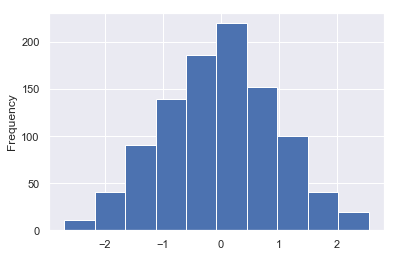

In [24]:
df[2].plot(kind = "hist")
printPercentile(2)

<< 4 >>
第 10 百分位數 ： -4.61517102427409
第 20 百分位數 ： -2.517436140617458
第 30 百分位數 ： -1.2600624014862292
第 40 百分位數 ： -0.21760530583537546
第 50 百分位數 ： 0.8628175948027952
第 60 百分位數 ： 1.955396613872727
第 70 百分位數 ： 3.129082487798437
第 80 百分位數 ： 4.565702796522863
第 90 百分位數 ： 7.218130105675309

<< Summary statistics >> 
count    1000.000000
mean        1.092329
std         4.538834
min       -16.421901
25%        -1.801997
50%         0.862818
75%         3.843172
max        17.565345
Name: 4, dtype: float64


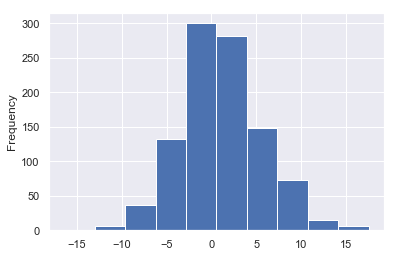

In [25]:
df[4].plot(kind = "hist")
printPercentile(4)

In [26]:
train

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332
5,-0.773247,-0.123227,0.047423,-0.210266,10.377793,0.526604,-2.751616,0.315541,0.608603,-0.043421,...,-1.487714,0.792790,-0.540711,0.114115,-0.277477,-0.896411,-2.805207,0.469162,3.614157,0.081689
6,1.483814,-0.296301,0.452697,0.053363,-4.480227,-1.189786,1.963951,-0.610189,1.312698,2.493390,...,-0.064301,-1.902989,3.441767,1.481434,-0.507055,-0.117490,1.877093,-0.531129,-1.574326,-1.733600
7,0.763901,-3.492086,0.329564,1.300720,5.037783,0.149122,-5.014214,-1.966723,-1.828132,0.289911,...,-0.314328,1.317465,-0.802101,-1.622429,3.930147,0.952521,-0.775724,1.047129,3.252374,-1.320290
8,0.380964,-1.533580,0.786602,1.311827,-6.122086,1.837293,1.872341,-2.604811,-0.179111,2.655691,...,-1.221536,-1.928555,1.500312,0.381377,-1.090007,-0.135532,0.897454,-0.157605,-0.353676,1.203563
9,-0.688936,-0.879470,-1.150302,-0.131129,-0.617483,-0.774317,-3.061153,-0.516864,-0.924853,-1.401560,...,-0.119981,0.531981,-1.326816,-0.457071,-2.998023,-0.061020,2.745646,0.861720,-1.413428,1.714611


In [27]:
# 讀取資料
X = train
y = np.ravel(trainLabel)

# 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 87)


# Grid Search - to find best parameter set
from sklearn.model_selection import GridSearchCV  
# 建立模型
clf = RandomForestClassifier(random_state = 87, n_jobs=-1)
# fit the model
clf.fit(X_train, y_train)
# Before tunning AUC score
score = cross_val_score(clf, X_train, y_train, n_jobs = -1 , cv = 10).mean()
print("Before tunning AUC score = %s" % score)



# 列出參數組合
param_grid = {"criterion" : ["entropy", "gini"],
              "max_depth" : [x for x in np.arange(2, 11, 4)], # [2,6,10]
              "min_samples_split" : [2,5,10],
              "min_samples_leaf" : [2,5,10],
              "n_estimators" : [100], # 使用 n 顆樹
              "max_features" : ['auto', 'sqrt'], # 如何選取 features
              "oob_score" : [True]
             }
gs = GridSearchCV(estimator = RandomForestClassifier(random_state = 87),
                  param_grid = param_grid,
                  cv = 5,
                  scoring = "accuracy")
gs.fit(X_train, y_train)
print("best_score  : %s" % gs.best_score_)
print("best_params : %s \n" % gs.best_params_)

# ----- build the best model (according to GridSearch) -----
# 建立由目前training set找出最佳參數組合的模型
clf = gs.best_estimator_

# 訓練模型
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Before tunning AUC score = 0.8113539206252005
best_score  : 0.8585714285714285
best_params : {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'oob_score': True} 

Acuuracy:  0.8566666666666667


In [28]:
# feature_importances_
print("feature_importances_ : \n%s" % (clf.feature_importances_))

feature_importances_ : 
[0.01064924 0.01096367 0.01091443 0.01599433 0.03621596 0.00975663
 0.04699817 0.02248812 0.01289465 0.00825934 0.01278144 0.01441625
 0.11553567 0.01095835 0.13057387 0.00865637 0.00958458 0.00755273
 0.05073414 0.00866765 0.01341248 0.01257244 0.02530196 0.03207524
 0.01130034 0.01020566 0.0126444  0.01204616 0.04721739 0.0354567
 0.01017771 0.00988593 0.03829493 0.01146562 0.03021114 0.00839597
 0.04677078 0.00836967 0.02033183 0.04926805]


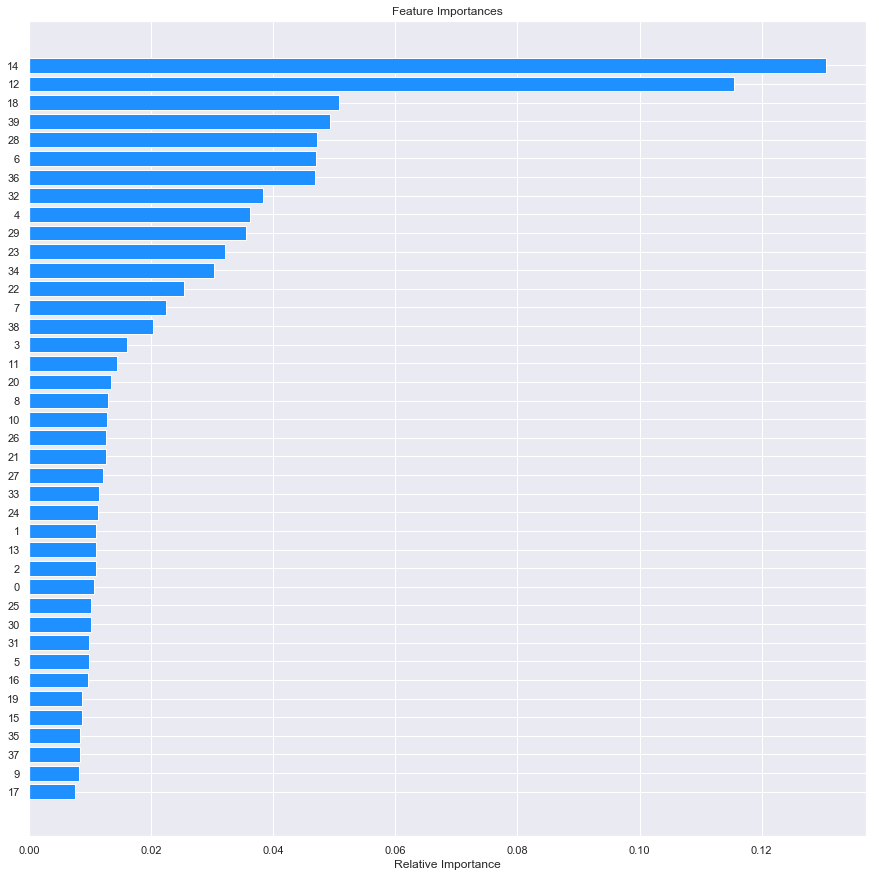

In [29]:
# plot feature_importances_
fig, ax = plt.subplots(figsize = (15, 15))

features = df.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='dodgerblue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [30]:
# 預測測試集
prediction = clf.predict(test)

submit = pd.DataFrame()
submit['Id'] = [i for i in range(1, 9001)]
submit['Solution'] = prediction

submit.head(5)

,Id,Solution
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0


In [32]:
# # save
submit.to_csv(('D:/GitHub/3rd-ML100Days/HomeWork/Data/submit_1.csv') , index=False)

Private Score : 0.85417

Public Score : 0.85804

用部分特徵再做一次（Feature Importances 相對高的）

In [34]:
train_path = ('D:/GitHub/3rd-ML100Days/HomeWork/Data/data-science-london-scikit-learn/train.csv')
test_path = ('D:/GitHub/3rd-ML100Days/HomeWork/Data/data-science-london-scikit-learn/test.csv')
trainLabel_path = ('D:/GitHub/3rd-ML100Days/HomeWork/Data/data-science-london-scikit-learn/trainLabels.csv')

# read data from data_path
train = pd.read_csv(train_path, header=None)
test = pd.read_csv(test_path, header=None)
trainLabel = pd.read_csv(trainLabel_path, header=None)

In [35]:
features[importances > 0.02]

Int64Index([4, 6, 7, 12, 14, 18, 22, 23, 28, 29, 32, 34, 36, 38, 39], dtype='int64')

In [36]:
# 讀取資料
X = train[features[importances > 0.02]]
y = np.ravel(trainLabel)

# 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 87)


# Grid Search - to find best parameter set
from sklearn.model_selection import GridSearchCV  
# 建立模型
clf = RandomForestClassifier(random_state = 87, n_jobs=-1)
# fit the model
clf.fit(X_train, y_train)
# Before tunning AUC score
score = cross_val_score(clf, X_train, y_train, n_jobs = -1 , cv = 10).mean()
print("Before tunning AUC score = %s" % score)



# 列出參數組合
param_grid = {"criterion" : ["entropy", "gini"],
              "max_depth" : [x for x in np.arange(2, 11, 4)], # [2,6,10]
              "min_samples_split" : [2,5,10],
              "min_samples_leaf" : [2,5,10],
              "n_estimators" : [100], # 使用 n 顆樹
              "max_features" : ['auto', 'sqrt'], # 如何選取 features
              "oob_score" : [True]
             }
gs = GridSearchCV(estimator = RandomForestClassifier(random_state = 87),
                  param_grid = param_grid,
                  cv = 5,
                  scoring = "accuracy")
gs.fit(X_train, y_train)
print("best_score  : %s" % gs.best_score_)
print("best_params : %s \n" % gs.best_params_)

# ----- build the best model (according to GridSearch) -----
# 建立由目前training set找出最佳參數組合的模型
clf = gs.best_estimator_

# 訓練模型
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Before tunning AUC score = 0.8470355466130115
best_score  : 0.8771428571428571
best_params : {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'oob_score': True} 

Acuuracy:  0.89


In [37]:
# feature_importances_
print("feature_importances_ : \n%s" % (clf.feature_importances_))

feature_importances_ : 
[0.05269005 0.06074936 0.03527732 0.13088357 0.17199198 0.07538474
 0.04173552 0.04300425 0.04907818 0.06088996 0.05616189 0.049062
 0.06954517 0.03248349 0.07106252]


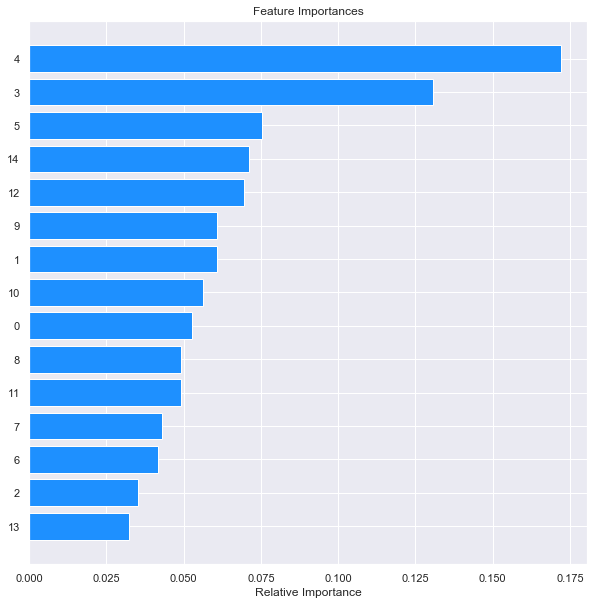

In [38]:
# plot feature_importances_
fig, ax = plt.subplots(figsize = (10, 10))

features = df.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='dodgerblue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [39]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [40]:
len(test[[4, 6, 7, 12, 14, 18, 22, 23, 28, 29, 32, 34, 36, 38, 39]].values.reshape(-1, 15))

9000

In [41]:
# 預測測試集
#test[[重要性高的cols]].values.reshape(-1, 15) --> why 15 : 因為選出15個feature
prediction = clf.predict(test[[4, 6, 7, 12, 14, 18, 22, 23, 28, 29, 32, 34, 36, 38, 39]].values.reshape(-1, 15))

submit = pd.DataFrame()
submit['Id'] = [i for i in range(1, 9001)]
submit['Solution'] = prediction

submit.head(5)

,Id,Solution
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0


In [43]:
# # save
submit.to_csv(('D:/GitHub/3rd-ML100Days/HomeWork/Data/submit_3.csv') , index=False)

Private Score : 0.87903

Public Score : 0.87779